V1M_SRR9336468_Aligned.sortedByCoord.out
V1M_SRR9336471_Aligned.sortedByCoord.out
V1M_SRR9336474_Aligned.sortedByCoord.out


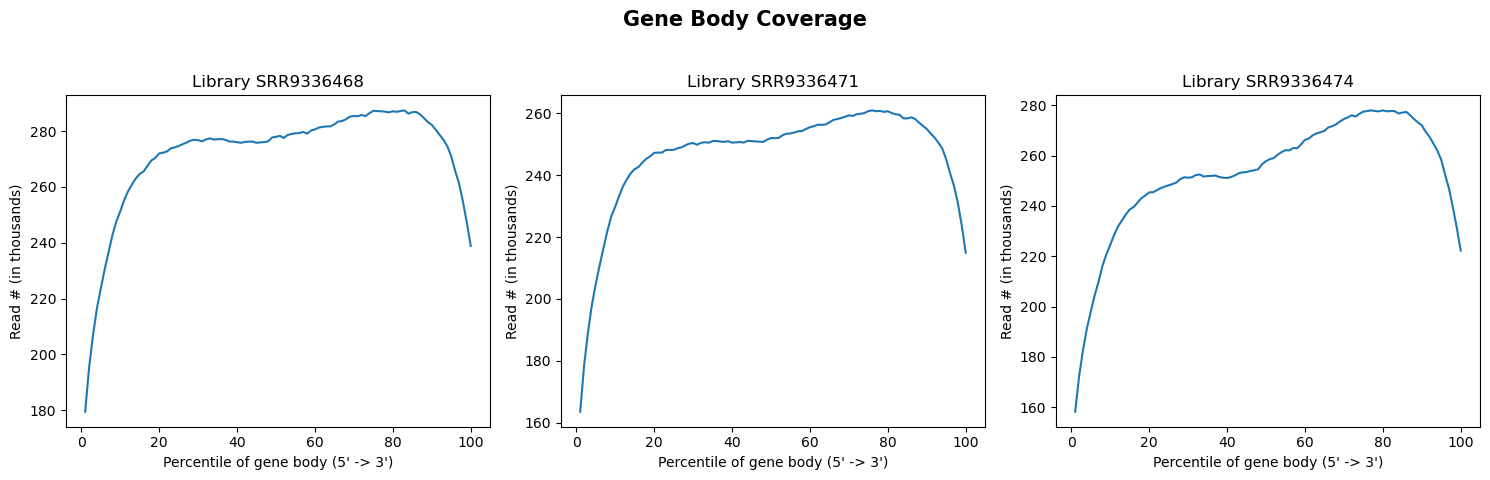

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

with open('output.geneBodyCoverage.txt') as f:
    lines = f.readlines()

percentiles = {}
for i in range(1,len(lines)):
    # skip i = 0, this is the header
    line_parts = lines[i].replace('\n','').split('\t')
    file = line_parts[0]
    percs = [float(x) for x in line_parts[1:]]
    percentiles[file] = percs

df = pd.DataFrame(percentiles)
x = range(1, 101)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
plt.suptitle('Gene Body Coverage', size = 15, weight = 'bold')
for i in range(len(df.columns)):
    col = df.columns[i]
    print(col)
    axs[i].plot(x, df[col]/1000)
    axs[i].set_xlabel("Percentile of gene body (5' -> 3')")
    axs[i].set_ylabel("Read # (in thousands)")
    axs[i].set_title(
        'Library ' + col.split('_')[1]
    )

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()